In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics, ensemble

In [2]:
%matplotlib inline

In [31]:
def clplot(X,labels,title,plt1,i):
    pltN=plt1[ int(i/4),  i%4 ]
    pltN.scatter(X[:,0],X[:,1], c = labels, cmap=plt.cm.spectral)
    pltN.set_title(title)
    pltN.axis('equal')
    pltN.axis('off')

In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

In [5]:
data1 = pd.read_csv("dataset1.csv", sep='\t')
X = data1[['F1','F2']].get_values()
y = data1['T'].get_values()

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)
print (X_train.shape)
print (X_test.shape)

(804, 2)
(396, 2)


In [12]:
def stack_pred(estimator, X, y, Xt, k=3, method='predict'):
    kf = KFold(n_splits=k, shuffle=True, random_state=0)
    t = 0.5 #порог
    
    if method == 'predict_proba' or method == 'predict':
        sX = np.zeros(X.shape[0]) 
    else:
        raise Exception('Error method')
    m_sX = np.zeros((k, (Xt.shape[0])))
    i = 0
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        estimator.fit(X_train,y_train)
    
        if method == 'predict_proba':
            pred = estimator.predict_proba(X_test)[:,1]
            pred2 = estimator.predict_proba(Xt)[:,1]
        else:
            pred = estimator.predict(X_test)
            pred2 = estimator.predict(Xt)
        sX[test_index] = pred
        m_sX[i] = pred2
        i += 1
    if method == 'predict_proba':
        sXt = m_sX.mean(axis = 0)
    else:
        sXt = (m_sX.mean(axis = 0) > t).astype(int)
    return sX, sXt

In [41]:
estimator = KNeighborsClassifier()
sX, sXt = stack_pred(estimator=estimator, X=X_train, y=y_train, Xt=X_test,method='predict')
sXp, sXtp = stack_pred(estimator=estimator, X=X_train, y=y_train, Xt=X_test,method='predict_proba')

In [42]:
X_train_new = np.hstack((X_train,np.matrix(sX).T))
X_test_new = np.hstack((X_test,np.matrix(sXt).T))

X_train_newP = np.hstack((X_train,np.matrix(sXp).T))
X_test_newP = np.hstack((X_test,np.matrix(sXtp).T))

In [43]:
def pr(estimator, X_train, X_test, y_train, y_test):
    estimator.fit(X_train, y_train)
    preds = estimator.predict(X_test)
    print(metrics.classification_report(y_test, preds, digits=4), metrics.roc_auc_score(y_test, preds))

In [44]:
def metr(estimator):
    pr(estimator, X_train,X_test, y_train, y_test)
    pr(estimator, X_train_new,X_test_new, y_train, y_test)
    pr(estimator, X_train_newP,X_test_newP, y_train, y_test)

In [45]:
log_ress = LogisticRegression()
metr(log_ress)

             precision    recall  f1-score   support

          0     0.8080    0.7426    0.7739       136
          1     0.8708    0.9077    0.8889       260

avg / total     0.8493    0.8510    0.8494       396
 0.825169683258
             precision    recall  f1-score   support

          0     0.8696    0.8824    0.8759       136
          1     0.9380    0.9308    0.9344       260

avg / total     0.9145    0.9141    0.9143       396
 0.906561085973
             precision    recall  f1-score   support

          0     0.8615    0.8235    0.8421       136
          1     0.9098    0.9308    0.9202       260

avg / total     0.8932    0.8939    0.8933       396
 0.877149321267


In [46]:
svc = SVC()
metr(svc)

             precision    recall  f1-score   support

          0     0.8952    0.8162    0.8538       136
          1     0.9081    0.9500    0.9286       260

avg / total     0.9036    0.9040    0.9029       396
 0.883088235294
             precision    recall  f1-score   support

          0     0.9000    0.8603    0.8797       136
          1     0.9286    0.9500    0.9392       260

avg / total     0.9188    0.9192    0.9187       396
 0.905147058824
             precision    recall  f1-score   support

          0     0.8992    0.7868    0.8392       136
          1     0.8953    0.9538    0.9236       260

avg / total     0.8966    0.8965    0.8947       396
 0.870305429864


In [47]:
kn = KNeighborsClassifier()
metr(kn)

             precision    recall  f1-score   support

          0     0.8662    0.9044    0.8849       136
          1     0.9488    0.9269    0.9377       260

avg / total     0.9204    0.9192    0.9196       396
 0.915667420814
             precision    recall  f1-score   support

          0     0.8881    0.8750    0.8815       136
          1     0.9351    0.9423    0.9387       260

avg / total     0.9190    0.9192    0.9190       396
 0.908653846154
             precision    recall  f1-score   support

          0     0.8623    0.8750    0.8686       136
          1     0.9341    0.9269    0.9305       260

avg / total     0.9095    0.9091    0.9092       396
 0.900961538462


In [48]:
rf = ensemble.RandomForestClassifier()
metr(rf)

             precision    recall  f1-score   support

          0     0.9051    0.9118    0.9084       136
          1     0.9537    0.9500    0.9518       260

avg / total     0.9370    0.9369    0.9369       396
 0.930882352941
             precision    recall  f1-score   support

          0     0.9407    0.9338    0.9373       136
          1     0.9655    0.9692    0.9674       260

avg / total     0.9570    0.9571    0.9570       396
 0.951527149321
             precision    recall  f1-score   support

          0     0.9531    0.8971    0.9242       136
          1     0.9478    0.9769    0.9621       260

avg / total     0.9496    0.9495    0.9491       396
 0.936990950226


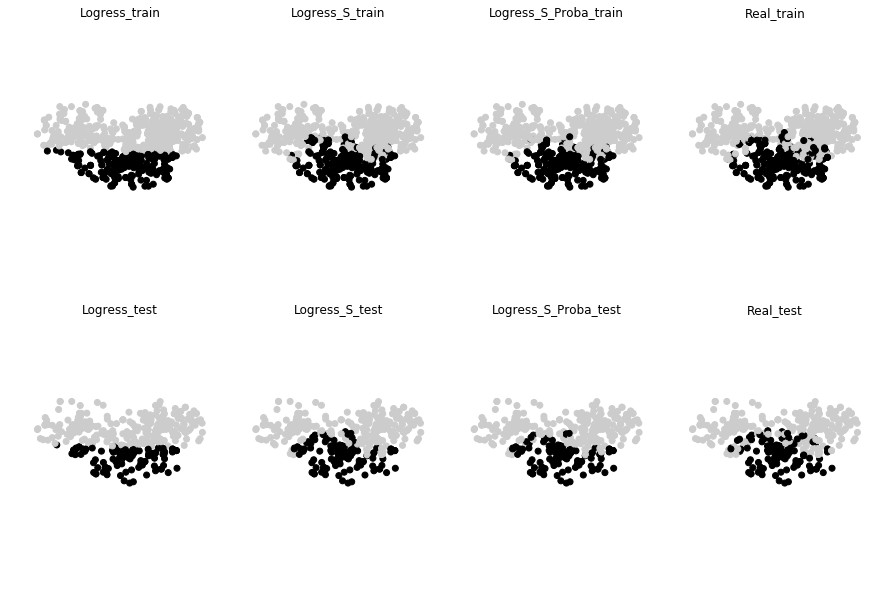

In [49]:
log_ress = LogisticRegression().fit(X_train, y_train)
log_ress_s = LogisticRegression().fit(X_train_new, y_train)
log_ress_s_p = LogisticRegression().fit(X_train_newP, y_train)

fig, axis = plt.subplots(nrows=2, ncols=4, figsize=(15, 10))
i = 0
clplot(X_train, log_ress.predict(X_train),'Logress_train',axis,i);i+=1
clplot(X_train, log_ress_s.predict(X_train_new),'Logress_S_train',axis,i);i+=1
clplot(X_train, log_ress_s_p.predict(X_train_newP),'Logress_S_Proba_train',axis,i);i+=1
clplot(X_train, y_train,'Real_train',axis,i);i+=1

clplot(X_test, log_ress.predict(X_test),'Logress_test',axis,i);i+=1
clplot(X_test, log_ress_s.predict(X_test_new),'Logress_S_test',axis,i);i+=1
clplot(X_test, log_ress_s_p.predict(X_test_newP),'Logress_S_Proba_test',axis,i);i+=1
clplot(X_test, y_test,'Real_test',axis,i);i+=1